<a href="https://colab.research.google.com/github/AldoEHF14/SciKitLearn-Machine-Learning/blob/main/Graficar_Iteracciones_RedNeuronal_Prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal - Predicción
## ¿Que es una Red Neorunal Predictiva?

Una red neuronal predictiva es un tipo de red neuronal artificial que se entrena con datos históricos para aprender patrones y relaciones complejas entre variables, con el objetivo de hacer predicciones sobre datos futuros o desconocidos.

## ¿Para qué se utiliza?
Regresión (valores continuos):

- Predecir el precio de una casa.
- Estimar la temperatura de mañana.
- Pronosticar la demanda de un producto.



## Ejemplo

Mostramos cómo entrenar una red neuronal, para poder predecir valores, e incluso utilizamos un ciclo While, muy sencillo, que nos permitirá buscar el modelo que tenga el valor de Score más alto (Buen nivel de presicion). Tiempo en que se tarda un celular en cargarse y el procentaje de carga de la bateria

Scikit-Learn:
[MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

Dataset de prueba: [Dataset](https://docs.google.com/spreadsheets/d/1pJ7kE8UXpn8Zzn6J7M9IAbECMJpkJwNipSwcc693nFQ/edit?gid=0#gid=0)

Este dataset contiene la carga de un bateria el cual este tiene dos columnas Tiempo y Carga, el cual cuenta con 36 registros cada uno.  

In [ ]:
""" Importar librerías """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


In [ ]:
#Leer archivo desde el escritorio (Google Colab)
from google.colab import files
uploaded = files.upload()

Saving bateria.csv to bateria.csv


In [ ]:
# Leer el archivo CSV
datos = pd.read_csv("bateria.csv")

# Extraer las columnas como arrays de numpy
x = datos["Tiempo"].values
y = datos["Carga"].values

#Imprimir valores
# print(x)
# print(y)

# Convertir x a formato de matriz columna
X = x[:, np.newaxis]


0.9157872180799438
0.8877252410182598
0.8744157669419793
0.9097606224164587
0.9084403157751056
0.895674759385373
0.9988817097885996


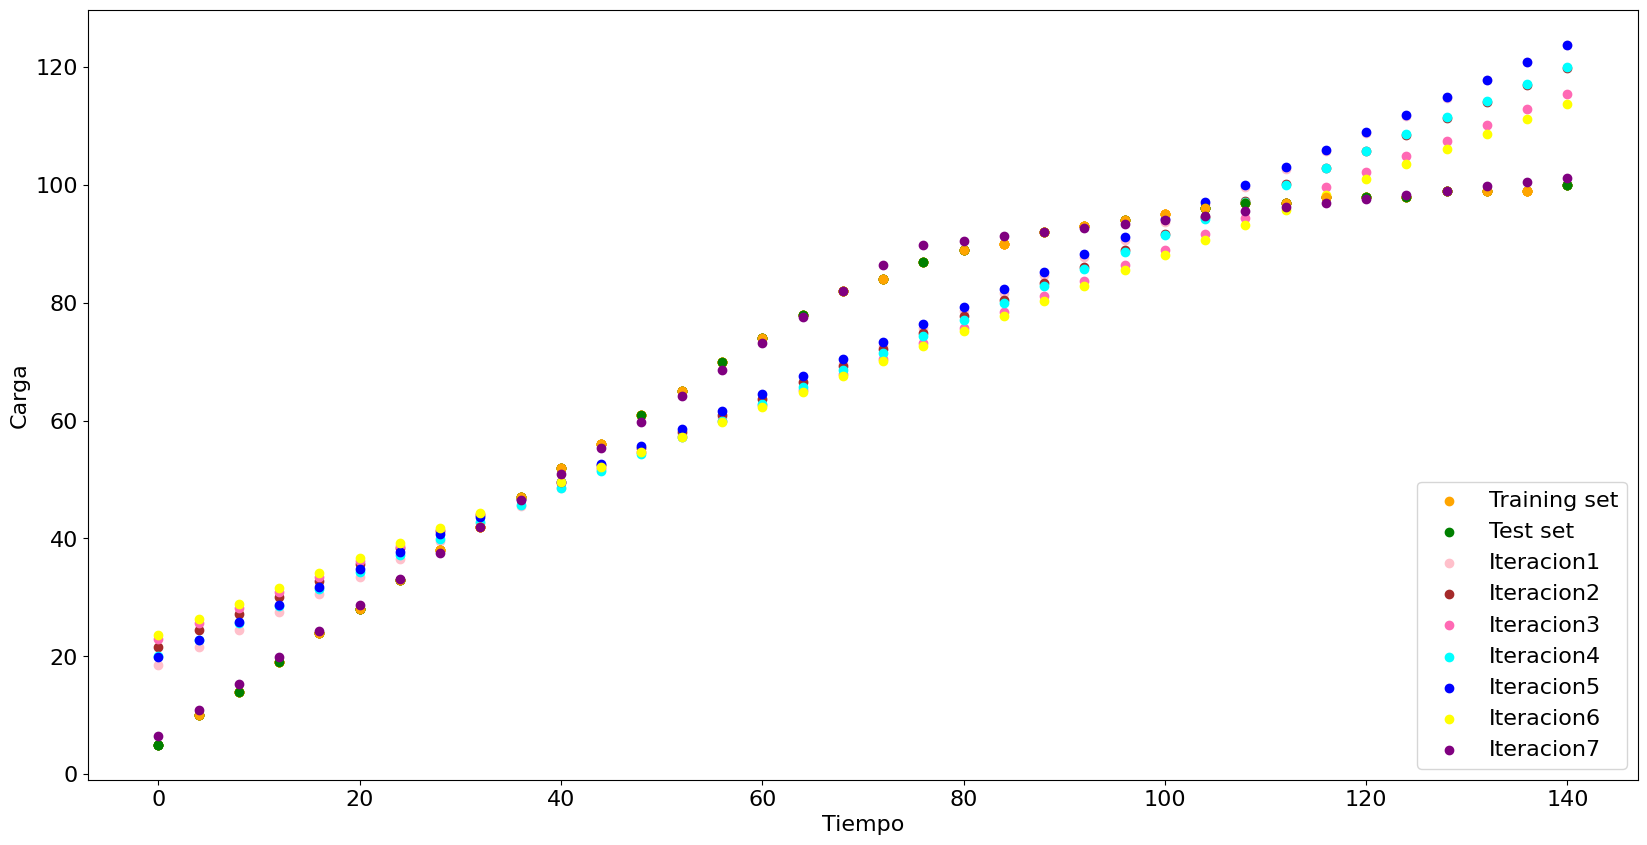

Predicción en t=20 minutos: 28.6871974951431


In [ ]:
# Entrenar el modelo hasta que supere 95% de score
i=0
plt.figure(figsize=(20,10))
plt.rc('font',size=16)
# Lista de colores
colors = ['teal','pink','brown','hotpink','aqua','blue','yellow','purple','black','salmon','olive','chocolate','wheat']

while True:
    i=i+1
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

    mlp = MLPRegressor(hidden_layer_sizes=(3, 3),
                       solver='lbfgs',
                       alpha=1e-5,
                       random_state=1)

    mlp.fit(X_train, y_train)
    print(mlp.score(X_train, y_train))

    plt.scatter(X_train,y_train,color='orange',label="Training set" if i==1 else"")
    plt.scatter(X_test,y_test,color='green',label="Test set" if i==1 else"")
    # Datos que se predeci el modelo del los datos de la X
    plt.scatter(X,mlp.predict(X),color=colors[i],label='Iteracion'+str(i))

    if mlp.score(X_train, y_train) > 0.98:
        break

plt.xlabel('Tiempo')
plt.ylabel('Carga')
plt.legend(loc='lower right')
plt.show()

# Predicción en t=20 minutos
prediccion = mlp.predict([[20]])
print("Predicción en t=20 minutos:", prediccion[0])

